In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('train_2.csv')
df.head()

,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,...,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,ADI_2015,SCHED_SURG_AREA_le,RACE_le,ETHNIC_GROUP_le,SCHED_HOSPITAL_le,SCHED_SURG_PROC_CD_le,STATUS
0,0,73.3,28.21,3056.0,102.000000,70.000000,83.000000,0,0,1,...,0,0,0,68.493519,2,16,2,0,277,1
1,1,26.1,25.61,2240.0,96.000000,58.000000,78.685965,0,0,0,...,0,0,0,75.203533,28,16,2,12,1243,0
2,1,19.0,37.76,3520.0,128.384177,76.327466,78.685965,0,0,1,...,0,0,0,59.740571,40,16,0,16,734,0
3,0,74.1,29.53,3200.0,128.384177,76.327466,78.685965,0,0,1,...,0,0,0,44.761703,40,16,2,16,617,1
4,0,57.8,26.91,3398.4,120.000000,60.000000,78.685965,1,0,0,...,0,0,0,44.718861,9,16,2,3,734,0


In [3]:
sum(df['STATUS'])/len(df['STATUS'])

0.21615

In [4]:
from sklearn.feature_selection import mutual_info_classif
df.columns.get_loc('STATUS')  

118

In [5]:
X = df.values[:,0:118]
Y = df.values[:,118]
feature_scores = mutual_info_classif(X,Y)

In [12]:
#15 features are selected
for score, fname in sorted(zip(feature_scores,df.columns),reverse=True)[:15]:
    print(fname, score)
    
for score, fname in sorted(zip(feature_scores,df.columns),reverse=True)[:15]:
    print("'"+fname+"',", end= " ")

SCHED_SURG_PROC_CD_le 0.1290916563131259
SCHED_SURG_AREA_le 0.04541455871720812
SCHED_HOSPITAL_le 0.03541337259143673
AGE_ON_CONTACT_DATE 0.014342755639924487
RACE_le 0.01125107970255712
ETHNIC_GROUP_le 0.01076487110310409
BETA_BLOCKERS 0.00983039829304988
DIURETICS 0.00904412026430701
INSULIN_MEDS 0.008561481148390948
ADI_2015 0.008464796167569899
LUPUS_HST 0.007994264600583278
CALCIUM_BLOCKERS 0.0074994377573762705
ASPIRIN 0.007221088340320758
WARFARIN 0.007120940449442337
ALDOSTERONE_BLOCKERS 0.007119307073262027
'SCHED_SURG_PROC_CD_le', 'SCHED_SURG_AREA_le', 'SCHED_HOSPITAL_le', 'AGE_ON_CONTACT_DATE', 'RACE_le', 'ETHNIC_GROUP_le', 'BETA_BLOCKERS', 'DIURETICS', 'INSULIN_MEDS', 'ADI_2015', 'LUPUS_HST', 'CALCIUM_BLOCKERS', 'ASPIRIN', 'WARFARIN', 'ALDOSTERONE_BLOCKERS', 

In [6]:
data_1=df[['SCHED_SURG_PROC_CD_le', 'SCHED_SURG_AREA_le', 'SCHED_HOSPITAL_le', 'AGE_ON_CONTACT_DATE', 'RACE_le', 'ETHNIC_GROUP_le', 'BETA_BLOCKERS', 'DIURETICS', 'INSULIN_MEDS', 'ADI_2015', 'LUPUS_HST', 'CALCIUM_BLOCKERS', 'ASPIRIN', 'WARFARIN', 'ALDOSTERONE_BLOCKERS']]
data_1.head()
data_1.shape

(80000, 15)

In [7]:
target_1=df[['STATUS']]
target_1.head()

,STATUS
0,1
1,0
2,0
3,1
4,0


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data_1, 
                                                    target_1, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [2]:
#LightGBM
import lightgbm as lgb
from sklearn import metrics
lgb_train = lgb.Dataset(x_train, y_train)
lgb_val_train = lgb.Dataset(x_val, y_val)

NameError: name 'x_train' is not defined

In [4]:
#Parameter tuning using hyperopt
import hyperopt as hp
import lightgbm as lgb
from hyperopt import Trials,fmin,STATUS_OK

In [ ]:
lgbm_space = {

# hp.choice.choice will select 1 value from the given list  , 'dart', 'goss', 'rf'
    'boosting_type': hp.hp.choice('boosting_type',  ['gbdt']),
    'num_leaves':hp.hp.choice('num_leaves', np.arange(10, 300,1, dtype=int)),

    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.05),
    'colsample_bytree':hp.hp.quniform('colsample_bytree',0.5,1.0,0.05),
    'min_child_weight':hp.hp.quniform('min_child_weight', 100, 1000,100),
    'reg_alpha': hp.hp.uniform('reg_alpha', 0.0, 1000.0),
    'reg_lambda': hp.hp.uniform('reg_lambda', 0.0, 1000.0),
    'learning_rate': hp.hp.loguniform('learning_rate', -4, 0),
    'feature_fraction': hp.hp.loguniform('feature_fraction', -4, 0),
    'bagging_fraction': hp.hp.loguniform('bagging_fraction', -4, 0),
    'bagging_frequency':hp.hp.choice('bagging_frequency', np.arange(5, 100,1, dtype=int)),
    'drop_rate': hp.hp.loguniform('drop_rate', -4, 0),
    'scale_pos_weight': hp.hp.uniform('scale_pos_weight', 6.0, 10.0),
    'metric' : 'auc',
    'nthread': 6, 
    'max_bin': 512
    }

In [3]:
def objective_m(params, n_folds=5):


    model = lgb.cv(params = params,
              train_set = lgb_train,
              num_boost_round = 10000,
              early_stopping_rounds = 10,
             nfold = n_folds)
  
    
  
    # returns the best average loss on validation set 
    
    loss = 1 - (max(model['auc-mean']))
    return loss


bayes_trials = Trials()
MAX_EVALS = 1000 # this controls the runtime 

lgbm_best_m = fmin(fn = objective_m, space = lgbm_space, algo = hp.tpe.suggest, 
max_evals = MAX_EVALS, trials = bayes_trials)

NameError: name 'Trials' is not defined

In [190]:
lgbm_best_m

{'bagging_fraction': 0.8884000001316312,
 'bagging_frequency': 94,
 'boosting_type': 0,
 'colsample_bytree': 0.75,
 'drop_rate': 0.04131132680918138,
 'feature_fraction': 0.4403509768776563,
 'learning_rate': 0.04929625613408228,
 'min_child_weight': 100.0,
 'num_leaves': 138,
 'reg_alpha': 0.40599448603849286,
 'reg_lambda': 266.3045463588428,
 'scale_pos_weight': 7.286378608616178,
 'subsample': 1.0}

In [208]:
#Best parameter set
lgbm_best_p={
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'bagging_fraction': 0.7189481779037972,
 'bagging_frequency': 22,
 'colsample_bytree': 0.8500000000000001,
 'drop_rate': 0.08758118965513137,
 'feature_fraction': 0.4342945357515209,
 'learning_rate': 0.03362127696747622,
 'min_child_weight': 100.0,
 'num_leaves': 43,
 'reg_alpha': 0.9371504533726928,
 'reg_lambda': 44.980612580024086,
 'scale_pos_weight': 7.937542806578743,
 'subsample': 0.6000000000000001
}

In [213]:
lgb_gbm = lgb.train(params = lgbm_best_p, train_set = lgb_train,
                num_boost_round = 500, valid_sets = [lgb_val_train, lgb_train],
               valid_names = ['Evaluation', 'Train'])

[1]	Train's binary_logloss: 0.516418	Evaluation's binary_logloss: 0.52236
[2]	Train's binary_logloss: 0.516808	Evaluation's binary_logloss: 0.522292
[3]	Train's binary_logloss: 0.514147	Evaluation's binary_logloss: 0.51924
[4]	Train's binary_logloss: 0.514401	Evaluation's binary_logloss: 0.51912
[5]	Train's binary_logloss: 0.514013	Evaluation's binary_logloss: 0.518495
[6]	Train's binary_logloss: 0.514287	Evaluation's binary_logloss: 0.518529
[7]	Train's binary_logloss: 0.514737	Evaluation's binary_logloss: 0.518797
[8]	Train's binary_logloss: 0.517439	Evaluation's binary_logloss: 0.521204
[9]	Train's binary_logloss: 0.520623	Evaluation's binary_logloss: 0.524071
[10]	Train's binary_logloss: 0.522687	Evaluation's binary_logloss: 0.525922
[11]	Train's binary_logloss: 0.52414	Evaluation's binary_logloss: 0.527244
[12]	Train's binary_logloss: 0.527729	Evaluation's binary_logloss: 0.530575
[13]	Train's binary_logloss: 0.529974	Evaluation's binary_logloss: 0.532692
[14]	Train's binary_loglo

[215]	Train's binary_logloss: 0.714237	Evaluation's binary_logloss: 0.718288
[216]	Train's binary_logloss: 0.714147	Evaluation's binary_logloss: 0.718228
[217]	Train's binary_logloss: 0.713842	Evaluation's binary_logloss: 0.717976
[218]	Train's binary_logloss: 0.713609	Evaluation's binary_logloss: 0.717794
[219]	Train's binary_logloss: 0.713291	Evaluation's binary_logloss: 0.71753
[220]	Train's binary_logloss: 0.713053	Evaluation's binary_logloss: 0.717326
[221]	Train's binary_logloss: 0.712967	Evaluation's binary_logloss: 0.717304
[222]	Train's binary_logloss: 0.712864	Evaluation's binary_logloss: 0.717243
[223]	Train's binary_logloss: 0.712761	Evaluation's binary_logloss: 0.717211
[224]	Train's binary_logloss: 0.712481	Evaluation's binary_logloss: 0.717008
[225]	Train's binary_logloss: 0.712423	Evaluation's binary_logloss: 0.716984
[226]	Train's binary_logloss: 0.712379	Evaluation's binary_logloss: 0.716953
[227]	Train's binary_logloss: 0.712176	Evaluation's binary_logloss: 0.716798


[427]	Train's binary_logloss: 0.687842	Evaluation's binary_logloss: 0.700042
[428]	Train's binary_logloss: 0.687701	Evaluation's binary_logloss: 0.699957
[429]	Train's binary_logloss: 0.687635	Evaluation's binary_logloss: 0.699945
[430]	Train's binary_logloss: 0.687554	Evaluation's binary_logloss: 0.699894
[431]	Train's binary_logloss: 0.687414	Evaluation's binary_logloss: 0.699792
[432]	Train's binary_logloss: 0.687378	Evaluation's binary_logloss: 0.699783
[433]	Train's binary_logloss: 0.687278	Evaluation's binary_logloss: 0.699724
[434]	Train's binary_logloss: 0.687215	Evaluation's binary_logloss: 0.699678
[435]	Train's binary_logloss: 0.687124	Evaluation's binary_logloss: 0.699619
[436]	Train's binary_logloss: 0.687068	Evaluation's binary_logloss: 0.69959
[437]	Train's binary_logloss: 0.687042	Evaluation's binary_logloss: 0.699572
[438]	Train's binary_logloss: 0.687004	Evaluation's binary_logloss: 0.69956
[439]	Train's binary_logloss: 0.686895	Evaluation's binary_logloss: 0.699464
[

In [214]:
y_probs_train = lgb_gbm.predict(x_train)
y_probs_test = lgb_gbm.predict(x_test)

In [215]:
# LightGBM train AUC
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_probs_train)
metrics.auc(fpr, tpr)

0.8466220679081399

In [216]:
# LightGBM test AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs_test)
metrics.auc(fpr, tpr)

0.825803219900771

In [217]:
df_test=pd.read_csv('test_1.csv')
df.head()

,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,...,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,ADI_2015,SCHED_SURG_AREA_le,RACE_le,ETHNIC_GROUP_le,SCHED_HOSPITAL_le,SCHED_SURG_PROC_CD_le,STATUS
0,0,73.3,28.21,3056.0,102.000000,70.000000,83.000000,0,0,1,...,0,0,0,68.493519,2,16,2,0,277,1
1,1,26.1,25.61,2240.0,96.000000,58.000000,78.685965,0,0,0,...,0,0,0,75.203533,28,16,2,12,1243,0
2,1,19.0,37.76,3520.0,128.384177,76.327466,78.685965,0,0,1,...,0,0,0,59.740571,40,16,0,16,734,0
3,0,74.1,29.53,3200.0,128.384177,76.327466,78.685965,0,0,1,...,0,0,0,44.761703,40,16,2,16,617,1
4,0,57.8,26.91,3398.4,120.000000,60.000000,78.685965,1,0,0,...,0,0,0,44.718861,9,16,2,3,734,0


In [218]:
data_test_f=df_test[['SCHED_SURG_PROC_CD_le', 'SCHED_SURG_AREA_le', 'SCHED_HOSPITAL_le', 'AGE_ON_CONTACT_DATE', 'RACE_le', 'ETHNIC_GROUP_le', 'BETA_BLOCKERS', 'DIURETICS', 'INSULIN_MEDS', 'ADI_2015', 'LUPUS_HST', 'CALCIUM_BLOCKERS', 'ASPIRIN', 'WARFARIN', 'ALDOSTERONE_BLOCKERS']]
data_test_f.head()

,SCHED_SURG_PROC_CD_le,SCHED_SURG_AREA_le,SCHED_HOSPITAL_le,AGE_ON_CONTACT_DATE,RACE_le,ETHNIC_GROUP_le,BETA_BLOCKERS,DIURETICS,INSULIN_MEDS,ADI_2015,LUPUS_HST,CALCIUM_BLOCKERS,ASPIRIN,WARFARIN,ALDOSTERONE_BLOCKERS
0,857,33,13,59.7,14,2,0.0,0.0,0.0,67.230324,0.0,0.0,0.0,0.0,0.0
1,74,27,11,84.9,14,2,0.0,1.0,0.0,67.405837,0.0,0.0,1.0,0.0,0.0
2,587,33,13,52.2,14,2,0.0,1.0,1.0,66.937556,0.0,0.0,1.0,1.0,0.0
3,440,33,13,58.7,14,2,0.0,0.0,0.0,67.077581,0.0,0.0,0.0,0.0,0.0
4,773,26,11,28.6,14,2,0.0,0.0,0.0,58.875956,0.0,0.0,0.0,0.0,0.0


In [219]:
df_test['LOS_PROB']=lgb_gbm.predict(data_test_f)

In [220]:
df_test.head()

,ID1,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,...,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,ADI_2015,SCHED_SURG_AREA_le,RACE_le,ETHNIC_GROUP_le,SCHED_HOSPITAL_le,SCHED_SURG_PROC_CD_le,LOS_PROB
0,1,0.0,59.7,34.970000,3680.000000,140.0,82.0,77.000000,0.0,0.0,...,1.0,0.0,0.0,67.230324,33,14,2,13,857,0.646360
1,2,1.0,84.9,21.970000,1984.000000,126.0,67.0,79.000000,0.0,0.0,...,0.0,0.0,0.0,67.405837,27,14,2,11,74,0.757408
2,3,1.0,52.2,30.607103,3061.732616,122.0,78.0,78.468439,0.0,1.0,...,0.0,0.0,0.0,66.937556,33,14,2,13,587,0.799923
3,4,0.0,58.7,27.350000,3408.000000,113.0,70.0,87.000000,0.0,0.0,...,0.0,0.0,0.0,67.077581,33,14,2,13,440,0.700879
4,5,1.0,28.6,47.070000,3792.000000,130.0,80.0,78.468439,0.0,0.0,...,0.0,0.0,0.0,58.875956,26,14,2,11,773,0.440278


In [221]:
test_result=df_test[['ID1', 'LOS_PROB']]
test_result.head()

,ID1,LOS_PROB
0,1,0.646360
1,2,0.757408
2,3,0.799923
3,4,0.700879
4,5,0.440278


In [222]:
test_result.to_csv('test_result_2.csv', index=False)

In [89]:
#Sort records by PredProb
df['PredProb']=lgb_gbm.predict(data_1)
df.sort_values(by=['PredProb'], ascending=False)

,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,...,CIRRHOSIS_HST_1,ADI_2015,SCHED_SURG_AREA_le,RACE_le,ETHNIC_GROUP_le,SCHED_HOSPITAL_le,SCHED_SURG_PROC_CD_le,STATUS,PredProb,RiskLel
54849,1,63.2,23.060000,2083.200000,102.000000,70.000000,60.000000,1,0,0,...,0,67.177766,35,2,2,14,2,0,0.988949,high
55779,9999,9999.0,30.432342,3039.820547,128.384177,76.327466,78.685965,9999,9999,9999,...,9999,75.530109,35,11,3,14,3,1,0.987866,high
76086,0,61.7,31.320000,3296.000000,91.000000,59.000000,83.000000,0,0,0,...,1,61.780619,35,16,3,14,106,1,0.986829,high
17088,9999,9999.0,30.432342,3039.820547,128.384177,76.327466,78.685965,9999,9999,9999,...,9999,66.071303,35,11,3,14,3,1,0.986639,high
39723,0,59.4,22.470000,2800.000000,130.000000,80.000000,68.000000,0,0,0,...,0,66.106261,35,4,2,14,3,1,0.986591,high
28557,9999,9999.0,30.432342,3039.820547,128.384177,76.327466,78.685965,9999,9999,9999,...,9999,42.423361,35,11,3,14,3,1,0.986246,high
68451,9999,9999.0,30.432342,3039.820547,128.384177,76.327466,78.685965,9999,9999,9999,...,9999,67.131418,35,11,3,14,3,1,0.986085,high
53833,0,69.3,37.930000,3760.000000,110.000000,60.000000,69.000000,0,0,0,...,0,51.928498,35,16,2,14,3,1,0.985941,high
53621,9999,9999.0,30.432342,3039.820547,128.384177,76.327466,78.685965,9999,9999,9999,...,9999,63.238042,35,11,3,14,3,1,0.985786,high
78446,9999,9999.0,30.432342,3039.820547,128.384177,76.327466,78.685965,9999,9999,9999,...,9999,61.167898,35,11,3,14,3,1,0.985732,high


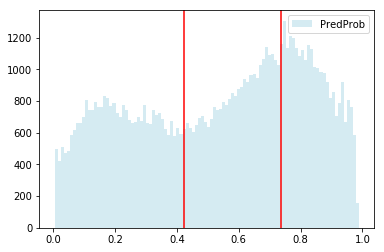

In [90]:
#Use histogram to show the distribution of PredProb. Red lines represent boundaries of low to medium and medium to high region.
plt.hist(df['PredProb'],
         bins = 100,
         alpha=0.5, 
         color='LightBlue',
        label = 'PredProb')
plt.axvline(x=0.422, color="Red")
plt.axvline(x=0.7375, color="Red")

plt.legend(loc = 'upper right')

plt.show()

We splited the patients into three bins so each bin has the same number of people. The patients to be splited have been sorted by the predited probability.

In [91]:
df['RiskLel']=pd.qcut(df['PredProb'], 3, labels=["low", "medium", "high"])
df.head()


,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,...,CIRRHOSIS_HST_1,ADI_2015,SCHED_SURG_AREA_le,RACE_le,ETHNIC_GROUP_le,SCHED_HOSPITAL_le,SCHED_SURG_PROC_CD_le,STATUS,PredProb,RiskLel
0,0,73.3,28.21,3056.0,102.000000,70.000000,83.000000,0,0,1,...,0,68.493519,2,16,2,0,277,1,0.605169,medium
1,1,26.1,25.61,2240.0,96.000000,58.000000,78.685965,0,0,0,...,0,75.203533,28,16,2,12,1243,0,0.075024,low
2,1,19.0,37.76,3520.0,128.384177,76.327466,78.685965,0,0,1,...,0,59.740571,40,16,0,16,734,0,0.264861,low
3,0,74.1,29.53,3200.0,128.384177,76.327466,78.685965,0,0,1,...,0,44.761703,40,16,2,16,617,1,0.881995,high
4,0,57.8,26.91,3398.4,120.000000,60.000000,78.685965,1,0,0,...,0,44.718861,9,16,2,3,734,0,0.177073,low


In [92]:
df[df['RiskLel']=='low'].PredProb.min()

0.005532563937771567

In [93]:
df[df['RiskLel']=='low'].PredProb.max()

0.3898450134357075

In [94]:
sum(df[df['RiskLel']=='low'].STATUS)/len(df[df['RiskLel']=='low'])

0.027224659691753854

The first bin is labled "low" that indicates this group of people have low risk to have "status=1". We can see the predited probability is in the range of 0.0055 to 0.3899. The true-positive rate for this bin is 2.72% which is low. So we would like to say our model predicts very well for the low risk people.

In [95]:
df[df['RiskLel']=='medium'].PredProb.min()

0.38987104630093755

In [96]:
df[df['RiskLel']=='medium'].PredProb.max()

0.7143766334301531

In [97]:
sum(df[df['RiskLel']=='medium'].STATUS)/len(df[df['RiskLel']=='medium'])

0.1519481006487419

The middle bin is labled "medium" that indicates this group of people are not sure of being positive or negative. We can see the predited probability is in the range of 0.3899 to 0.7144. The true-positive rate for this bin is 15.2%. That indicates the people in this bin is mostly negative.

In [98]:
df[df['RiskLel']=='high'].PredProb.min()

0.7143771860921831

In [99]:
df[df['RiskLel']=='high'].PredProb.max()

0.9889494304790107

In [100]:
sum(df[df['RiskLel']=='high'].STATUS)/len(df[df['RiskLel']=='high'])

0.4692867321683042

The last bin is labled "high" that indicates this group of people mostly likely have "STATUS=1". We can see the predited probability is in the range of 0.7144 to 0.9890. The true-positive rate for this bin is 46.9% which is less than 50%. That indicates our model does not perform very well in predicting high risk people. The total true positive rate for the whole dataset is 21.6%. The percentage of the people having LOS>5 in the "high" risk bin is about double the percentage of the whole sample set.

In [101]:
#Use another metric and try LightGBM again. The result is worse than the above.
lgb_params_auc = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'bagging_fraction': 0.7189481779037972,
 'bagging_frequency': 22,
 'colsample_bytree': 0.8500000000000001,
 'drop_rate': 0.08758118965513137,
 'feature_fraction': 0.4342945357515209,
 'learning_rate': 0.03362127696747622,
 'min_child_weight': 100.0,
 'num_leaves': 43,
 'reg_alpha': 0.9371504533726928,
 'reg_lambda': 44.980612580024086,
 'scale_pos_weight': 7.937542806578743,
 'subsample': 0.6000000000000001
}

In [102]:
lgb_gbm_auc = lgb.train(params = lgb_params_auc, train_set = lgb_train,
                num_boost_round = 100, valid_sets = [lgb_val_train, lgb_train],
               valid_names = ['Evaluation', 'Train'])

[1]	Train's auc: 0.688433	Evaluation's auc: 0.687783
[2]	Train's auc: 0.701526	Evaluation's auc: 0.696383
[3]	Train's auc: 0.753935	Evaluation's auc: 0.743328
[4]	Train's auc: 0.757598	Evaluation's auc: 0.745345
[5]	Train's auc: 0.760833	Evaluation's auc: 0.747264
[6]	Train's auc: 0.769976	Evaluation's auc: 0.756604
[7]	Train's auc: 0.774277	Evaluation's auc: 0.760006
[8]	Train's auc: 0.77306	Evaluation's auc: 0.758395
[9]	Train's auc: 0.770015	Evaluation's auc: 0.755487
[10]	Train's auc: 0.771929	Evaluation's auc: 0.756929
[11]	Train's auc: 0.777341	Evaluation's auc: 0.76279
[12]	Train's auc: 0.776066	Evaluation's auc: 0.761432
[13]	Train's auc: 0.7812	Evaluation's auc: 0.766229
[14]	Train's auc: 0.782617	Evaluation's auc: 0.768063
[15]	Train's auc: 0.781657	Evaluation's auc: 0.767046
[16]	Train's auc: 0.780351	Evaluation's auc: 0.765637
[17]	Train's auc: 0.782135	Evaluation's auc: 0.767763
[18]	Train's auc: 0.78088	Evaluation's auc: 0.766578
[19]	Train's auc: 0.780967	Evaluation's au

In [103]:
y_probs_train_auc = lgb_gbm_auc.predict(x_train.drop(columns = ['xgb_probs']))
y_probs_test_auc = lgb_gbm_auc.predict(x_test)

In [104]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_probs_train_auc)
metrics.auc(fpr, tpr)

0.8126091593513243

In [105]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs_test_auc)
metrics.auc(fpr, tpr)

0.8029718384710796

In [106]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [107]:
x_train, x_test, y_train, y_test = train_test_split(data_1, 
                                                    target_1, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [108]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=7,
...                              random_state=0)
rf_clf_model = rf_clf.fit(x_train, y_train)

C:\Users\hanzh_9uk0snw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [109]:
rf_train_probs = rf_clf_model.predict_proba(x_train)
rf_test_probs = rf_clf_model.predict_proba(x_test)

In [110]:
#Random Forest train AUC
fpr, tpr, thresholds = metrics.roc_curve(y_train, rf_train_probs[:,1])
metrics.auc(fpr, tpr)

0.7528956541049112

In [111]:
#Random Forest test AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_test_probs[:,1])
metrics.auc(fpr, tpr)

0.7472423139775703

In [112]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [113]:
x_train, x_test, y_train, y_test = train_test_split(data_1, 
                                                    target_1, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [114]:
lg_clf = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(x_train, y_train)

C:\Users\hanzh_9uk0snw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hanzh_9uk0snw\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hanzh_9uk0snw\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [115]:
lg_train_probs = lg_clf.predict_proba(x_train)
lg_test_probs = lg_clf.predict_proba(x_test)

In [116]:
#Logistic Regression train AUC
fpr, tpr, thresholds = metrics.roc_curve(y_train, lg_train_probs[:,1])
metrics.auc(fpr, tpr)

0.6629382016812784

In [117]:
#Logistic Regression test AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg_test_probs[:,1])
metrics.auc(fpr, tpr)

0.6720206618519282